In [3]:
import numpy as np 
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs, make_moons

import matplotlib.pyplot as plt 

In [4]:
n_samples = 300 
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers 

In [6]:
algorithms = LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction)

In [8]:
params = {
    'random_state': 0, 
    'n_samples': n_inliers, 
    'n_features': 2
}

datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5, **params)[0], 
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5], **params)[0], 
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, 0.3], **params)[0], 
    4.0 * (make_moons(n_samples=n_samples, noise=0.05, random_state=0)[0] - np.array([0.5, 0.25])), 
    14.0 * (np.random.rand(n_samples, 2) - 0.5)
    ]

<Figure size 600x1250 with 0 Axes>

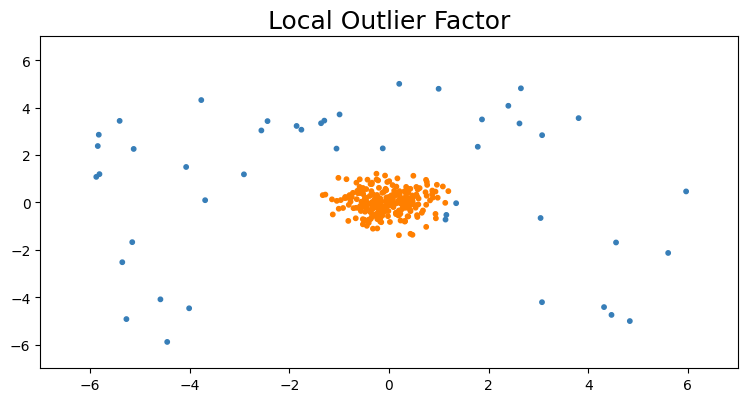

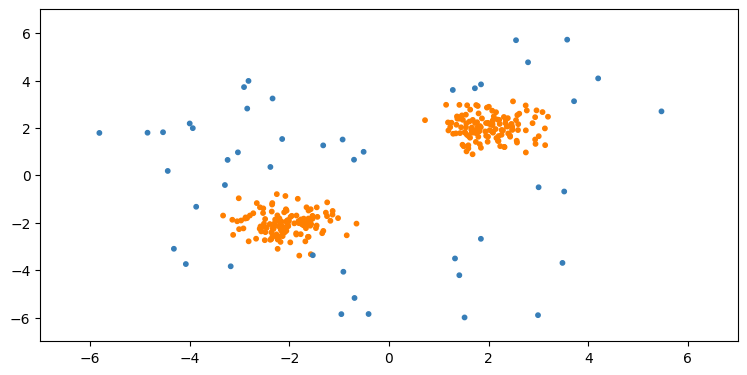

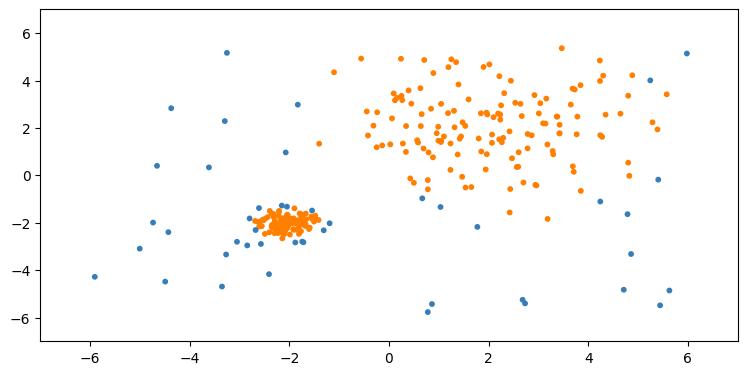

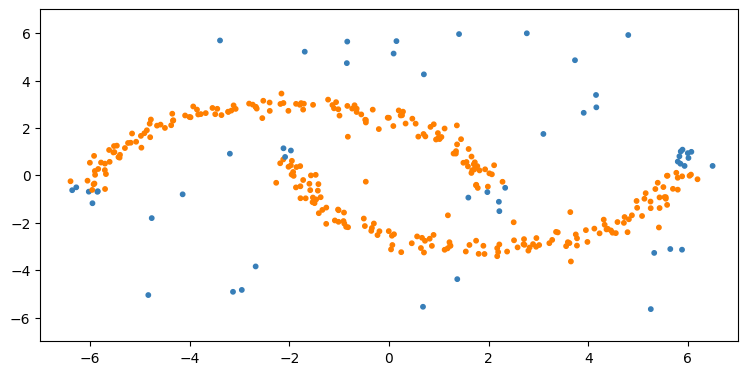

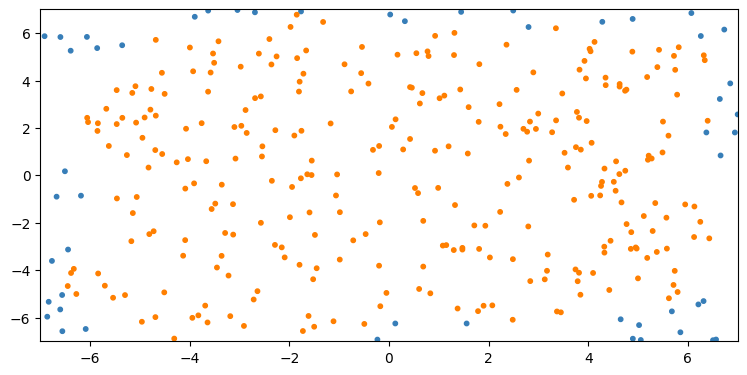

In [14]:
plt.figure(figsize=(1 * 2 + 4, 12.5))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)
plot_num = 1
for d_idx, d_set in enumerate(datasets):
    # Add Outliers
    X = np.concatenate([d_set, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))], axis=0)
    
    algorithms.fit(X)
    plt.figure(figsize=(9, 25))
    plt.subplot(len(datasets), 1, plot_num)
    
    if d_idx == 0:
        plt.title('Local Outlier Factor', size=18)
    
    y_pred = algorithms.fit_predict(X)
    
    colors = np.array(["#377eb8", "#ff7f00"])
    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])
    
    plt.xlim(-7, 7)
    plt.ylim(-7, 7)
    plt.xticks()
    plt.yticks()
    
    plot_num += 1
plt.show()